## xcengine example input: a simple dynamic notebook

This notebook creates two simple synthetic datasets which are generated on the fly by xcube. It can be converted to a compute engine container using the `xcetool`.

### Parameters cell

The cell below has been given a tag `parameters`, so `xcetool` can recognize that it is used to define parameters for the rest of the notebook. Any variable values set in the parameters cell can be overridden using environment variables when the container is run.

In [3]:
periods = 10

Import the `xcube.core.new` function to create our synthetic datasets.

In [4]:
import xcube.core.new

Now we create the output datasets. These datasets will be output and/or served dynamically by the compute engine container. Unlike parameter variables, they don't have to be marked specifically: any variable with the data type `xarray.DataSet` which is in scope at the end of the notebook will be recognized automatically as an output dataset.

In [5]:
cube1 = xcube.core.new.new_cube(
    variables={"v": lambda x, y, t: (x + y + t) % 10},
    time_periods=periods
)
cube1.attrs["title"] = "Cube 1"

In [6]:
cube2 = xcube.core.new.new_cube(
    variables={"v": lambda x, y, t: (x - y + t) % 10},
    time_periods=periods
)
cube2.attrs.pop("title", None)

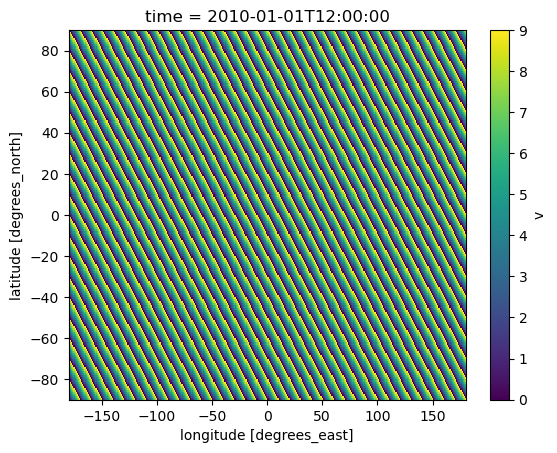

In [8]:
cube1.isel(time=0).v.plot.imshow()